## Apply sRGB gamma

In [1]:
import os
import glob

from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- Conversion function (Linear RGB -> sRGB)

In [2]:
def linrgb_to_srgb(img):
    assert img.dtype in [np.float32, np.float64] 
    img = img.copy()
    mask = img < 0.0031308
    img[~mask] = (img[~mask]**(1/2.4))*(1.055) - 0.055
    img[mask] = img[mask] * 12.92
    return img

#### Process image

In [3]:
output_folder = 'srgb'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [4]:
img_folder = os.path.join('..', '..', '..', '_dataset', 'MSR-Demosaicing', 'Dataset_LINEAR_without_noise', 'bayer_canon', 'groundtruth') 
filepaths_img = glob.glob(os.path.join(img_folder, '*'))

# img_path = '..\\..\\..\\_dataset\\MSR-Demosaicing\\Dataset_LINEAR_without_noise\\bayer_canon\\groundtruth\\9.png'


In [5]:
for img_path in filepaths_img:
    img = io.imread(img_path)
    img2 = img.astype(np.float32)/255
    img2 = linrgb_to_srgb(img2)*255
    img2 = img2.astype(np.uint8)
    
    # Get name of the input image
    _,t = os.path.split(img_path)
    name, _ = os.path.splitext(t)
    
    # Save
    io.imsave(os.path.join(output_folder, name + '_srgb.tif'), img2)

#### Visualize

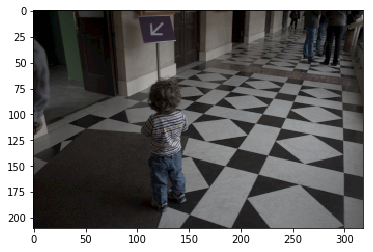

In [6]:
plt.imshow(img2)